# Reading files with AICSImageIO

The [AICSImageIO library](https://github.com/AllenCellModeling/aicsimageio) aims streamlining reading microscopy image data. 

To install the library, you need to call the following command. Make sure your conda environment is activated.

```
mamba install aicsimageio
```

In case specific proprietary file formats should be read, additional software must be installed. [Check the documentation for details](https://github.com/AllenCellModeling/aicsimageio#extra-format-installation). 

In [1]:
from aicsimageio import AICSImage

In [2]:
import stackview

First, we create an `AICSImage` object to see if it understands our file format. In the following example, we read an [OME Tif](https://docs.openmicroscopy.org/ome-model/5.6.3/ome-tiff/) file that was saved with ImageJ before. 

As example we are using here an image shared by [Célia Baroux et al(University of Zurich)](https://datadryad.org/stash/dataset/doi:10.5061/dryad.02v6wwq2c) that was resaved for demonstration purposes.

In [3]:
aics_image = AICSImage("data/EM_C_6_c0.ome.tif")
aics_image

<AICSImage [Reader: OmeTiffReader, Image-is-in-Memory: False]>

This object can already give us basic information such as image size/shape, dimensions and dimension names and order.

In [4]:
aics_image.shape

(1, 1, 256, 256, 256)

In [5]:
aics_image.dims

<Dimensions [T: 1, C: 1, Z: 256, Y: 256, X: 256]>

In [6]:
aics_image.dims.order

'TCZYX'

From this object, we can also retrieve pixels as numpy arrays.

In [7]:
np_image = aics_image.get_image_data("ZYX", T=0)
np_image.shape

(256, 256, 256)

StackViewNDArray([[ 29,  29,  41, ...,  24,  29,  36],
                  [ 27,  30,  26, ...,  29,  32,  26],
                  [ 20,  26,  23, ...,  32,  30,  25],
                  ...,
                  [ 18,  38,  27, ...,  89,  96, 134],
                  [ 29,  34,  38, ...,  94, 118, 106],
                  [ 35,  31,  23, ...,  73,  64,  56]], dtype=uint8)
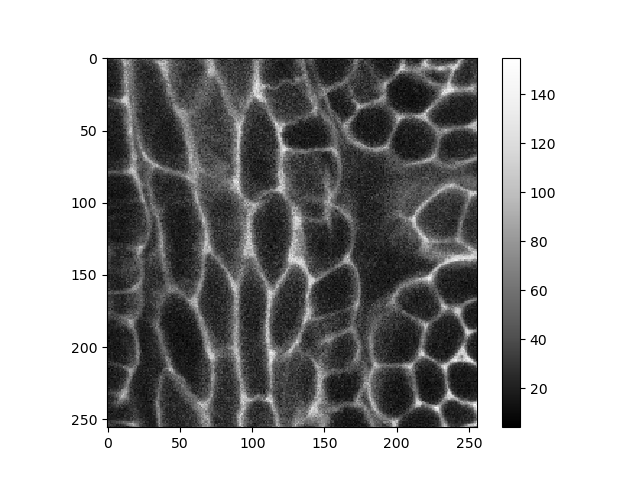
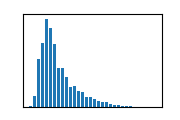

In [8]:
stackview.insight(np_image[128])

## Reading meta data

When working with microscopy image data, it is important to be aware of meta data, for example the voxel size. In order to do volume measurements in proper physical units, we need to know how large a voxel is in X, Y and Z.

In [9]:
aics_image.physical_pixel_sizes

PhysicalPixelSizes(Z=0.16784672897196262, Y=0.16776018346253663, X=0.16776018346253663)

And one can define a helper function for reading the voxel size in Z/Y/X format.

In [10]:
def get_voxel_size_from_aics_image(aics_image):
    return (aics_image.physical_pixel_sizes.Z,
            aics_image.physical_pixel_sizes.Y,
            aics_image.physical_pixel_sizes.X)

In [11]:
get_voxel_size_from_aics_image(aics_image)

(0.16784672897196262, 0.16776018346253663, 0.16776018346253663)

## Reading CZI files

In case additionally the  [`aicspylibczi` library](https://pypi.org/project/aicspylibczi/) is installed one can also open CZI files using AICSImageIO (example dataset kindly provided by kindly provided by Romina Piscitello-Gómez, MPI CBG).

In [12]:
czi_image = AICSImage("data/PupalWing.czi")
czi_image.shape

(1, 1, 80, 520, 692)

In [13]:
np_czi_image = czi_image.get_image_data("ZYX", T=0)
np_czi_image.shape

(80, 520, 692)

In [14]:
get_voxel_size_from_aics_image(czi_image)

(1.0, 0.20476190476190476, 0.20476190476190476)

## Exercise
Open a file from a recent project. Try out CZI, LIF, ND2 and others. Check the [aicsimageio documentation](https://github.com/AllenCellModeling/aicsimageio?tab=readme-ov-file#features) for additional installation instructions. 